In [9]:
saved_models_folder = "/mnt/cimec-storage6/users/nicola.debole/home/CQA/paper_models"
model_folder = "lfcbm_celeba_2025_02_20_15_09"
model_folder = "resnetcbm_celeba_2025_02_24_17_44"
model_folder = "lfcbm_shapes3d_2025_02_21_16_39"
model_folder = "resnetcbm_shapes3d_2025_02_24_21_18"
model_folder = "labo_shapes3d_2025_02_21_17_16"


# LOAD THE DATA

In [10]:
import sys
import os
os.chdir('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
sys.path.append('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
from datasets import GenericDataset
from torchvision import transforms
t = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224,224)),
        ])

model_name = model_folder.split("_")[0]
dataset = model_folder.split("_")[1]

if dataset=='celeba':
    concept_set = "/mnt/cimec-storage6/users/nicola.debole/home/CQA/data/concepts/celeba/handmade.txt"
    labels_names = ["female", "male"]
elif dataset=='shapes3d':
    concept_set = "/mnt/cimec-storage6/users/nicola.debole/home/CQA/data/concepts/shapes3d/shapes3d.txt"
    labels_names = ["not a red pill", "red pill"]
else:
    raise NotImplementedError()

data = GenericDataset(ds_name = dataset, split = 'test', transform = t)


2025-03-03 12:32:08.804 | DEBUG    | datasets:get_dataset:113 - Getting dataset shapes3d with kwargs {'split': 'test', 'transform': Compose(
    ToTensor()
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
)}
2025-03-03 12:32:09.322 | DEBUG    | datasets:__init__:33 - Loading dataset shapes3d from ./data/shapes3d/


# Run the model

In [11]:
import sys
import os
os.chdir('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
sys.path.append('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
from utils.args_utils import load_args
from models import get_model
from loguru import logger
from argparse import Namespace

args = {'load_dir':os.path.join(saved_models_folder,model_folder),
        
    }
args = Namespace(**args)
args = load_args(args)
# Load model
model = get_model(args)
logger.debug(f"Model loaded: {model}")

2025-03-03 12:32:09.418 | DEBUG    | utils.args_utils:load_args:13 - Loading from /mnt/cimec-storage6/users/nicola.debole/home/CQA/paper_models/labo_shapes3d_2025_02_21_17_16
2025-03-03 12:32:09.421 | DEBUG    | utils.args_utils:load_args:22 - Namespace(load_dir='/mnt/cimec-storage6/users/nicola.debole/home/CQA/paper_models/labo_shapes3d_2025_02_21_17_16', model='labo', logger='DEBUG', dataset='shapes3d', config=None, save_dir='./saved_models/labo_shapes3d_2025_02_21_17_16', wandb=True, seed=64, resume=None, concept_set='./data/concepts/shapes3d/shapes3d.txt', device='cuda', batch_size=258, glm_alpha=0.99, glm_step_size=0.1, n_iters=2000, lam=0.0007, saga_batch_size=256, clip_name='ViT-B/16', feature_layer='layer4', backbone='clip_RN50', activation_dir='./data/activations/', time='17_16', date='2025_02_21', conf_host='clicgpu2.cimec.unitn.it', conf_jobnum='f9e1ef34-a280-4bed-936e-daa9dfd56ae7', run_id='rm443jtw', n_concepts_final_layer=42)
2025-03-03 12:32:09.422 | INFO     | models:ge

In [ ]:
outputs = model.run('test')

2025-03-03 12:32:13.706 | DEBUG    | models.base:run:58 - Running model on test split.


2025-03-03 12:32:17.201 | DEBUG    | datasets:get_dataset:113 - Getting dataset shapes3d with kwargs {'split': 'test', 'transform': Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7f6734dbf2e0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)}
Running test:  52%|█████▏    | 61/117 [00:21<00:20,  2.70it/s]

In [ ]:
# Load last layer
try:
    print(model.model.final.weight)
    last_layer_weights = model.model.final.weight
except:
    last_layer_weights = model.model.final_layer.weight
    print(last_layer_weights)

Parameter containing:
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.7326e-03,
          0.0000e+00, -1.0174e-03, -4.6151e-03,  0.0000e+00,  0.0000e+00,
         -2.4890e-04,  0.0000e+00,  0.0000e+00, -6.3406e-04,  0.0000e+00,
          0.0000e+00, -4.0788e-02, -9.0327e-05,  0.0000e+00,  0.0000e+00,
         -5.1895e-01,  0.0000e+00, -1.4721e-02, -8.7659e-03, -9.5835e-03,
          0.0000e+00, -1.2561e-02, -3.5465e-03, -5.5753e-02, -1.4578e-02,
         -1.3404e-02, -3.4274e-02, -4.7324e-02, -5.1854e-02, -4.4877e-02,
         -2.4280e-02, -3.7596e-02, -3.9034e-02,  0.0000e+00,  0.0000e+00,
          0.0000e+00, -4.6492e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.7329e-03,
          0.0000e+00,  1.0161e-03,  4.6135e-03,  0.0000e+00,  0.0000e+00,
          2.4885e-04,  0.0000e+00,  0.0000e+00,  6.3372e-04,  0.0000e+00,
          0.0000e+00,  4.0789e-02,  9.0276e-05,  0.0000e+00,  0.0000e+00,
          5.1894e-01,  0.0000e+00,  1.4719e-02,  8.764

1727
Predicted not a red pill 14.363173484802246 because of:
[37.83%]5.43 red object (20, activation=-10.47120475769043)
[31.39%]4.51 pill shaped object (41, activation=-9.69625473022461)
[6.89%]0.99 medium size object (33, activation=-19.08806037902832)
[6.89%]-0.27 very small object (31, activation=7.879491329193115)
[6.89%]0.00 purple wall (18, activation=9.543410301208496)
[6.89%]-0.00 azure wall (15, activation=-11.002878189086914)


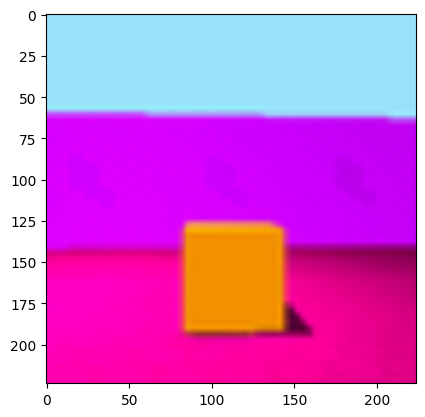

In [ ]:
import torch
from matplotlib import pyplot as plt

with open(concept_set) as f:
        concept_names = f.read().split("\n")

def get_sample_decision_summary(idx):
    img,concepts,label = data[idx]
    prediction_label = outputs['labels_pred'][idx]
    pred = torch.argmax(prediction_label)
    print(f"Predicted {labels_names[pred]} {prediction_label[pred]} because of:")
    concept_activations = outputs['concepts_pred'][idx].cpu()
    weights_label = last_layer_weights[pred].cpu()
    positive, pos_ids = torch.topk(weights_label*concept_activations, k=3, largest = True)
    #positive, pos_ids = torch.topk(concept_activations, k=3, largest = True)
    negative, neg_ids = torch.topk(weights_label*concept_activations, k=3, largest = False)
    #negative, neg_ids = torch.topk(concept_activations, k=3, largest = False)
    for i,p in enumerate(positive):
        index = pos_ids[i]
        perc = 100*p.item()/prediction_label[pred]
        print(f"[{perc:.2f}%]{p.item():.2f} {concept_names[index]} ({index}, activation={concept_activations[index]})")
    for i,n in enumerate(negative):
        index = neg_ids[i]
        print(f"[{perc:.2f}%]{n.item():.2f} {concept_names[index]} ({index}, activation={concept_activations[index]})")
    plt.imshow(img.permute(1,2,0))
    plt.imsave(f"{dataset}_test_{idx}.jpg", img)
    

import random

num = random.randint(0, 4999)  # Includes both 0 and 480
print(num)

num = 10690
num = 1836
get_sample_decision_summary(num)





100%|██████████| 30000/30000 [00:11<00:00, 2665.22it/s]


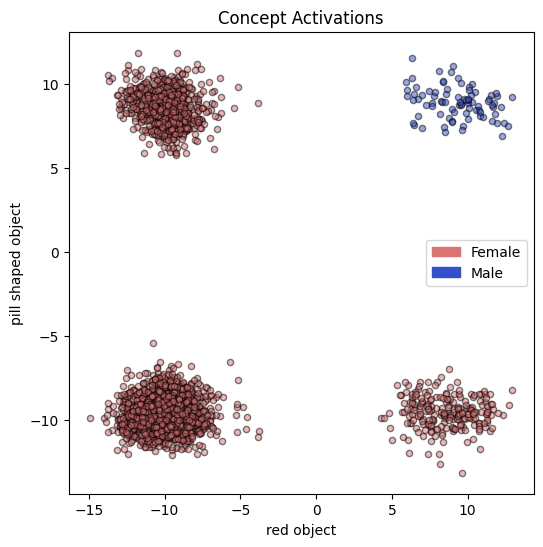

In [ ]:
from tqdm import tqdm
from matplotlib import pyplot as plt
PLOT_EVERY = 1
#decrease PLOT_EVERY to 1 to have maximum resolution

concept_activations = outputs['concepts_pred']
num_samples = concept_activations.shape[0]

x_idx = 23  # No_beard
y_idx = 35  # Wearing lipstick
#y_idx = 37 # Wearing necktie
x_idx = 20 # Red object
y_idx = 41  # Pill object

def check_condition(activations, idx, label):
    if activations[idx, 23] < 0.48 and activations[idx, 23]> 0.4 and label == 1:
        print(idx)


# Highlight some samples
highlight = []

# Plot the scatter plot
plt.figure(figsize=(6, 6))
for i in tqdm(range(num_samples)):
    if i%PLOT_EVERY == 0:
        #check_condition(concept_activations,i,outputs['labels_gt'][i])
        x = concept_activations[i,x_idx]
        y = concept_activations[i,y_idx]
        label = outputs['labels_gt'][i]
        if label == 0:
            color = '#dc7272ff' #Red
        else:
            color = '#344fcdff' #Blue

        #if outputs['concepts_gt'][i][23] == 0:
        #    color = '#ed94ebff'
        #else:
        #    color = '#743717ff'
      
        #if outputs['concepts_gt'][i][35] == 0:
        #    color = '#dc7272ff'
        #else:
        #    color = '#5ac1e3ff'
        plt.scatter(x, y, c=color, label="_nolegend_", s = 20, alpha=0.5, edgecolors='k')

for i in highlight:
    x = concept_activations[i,x_idx]
    y = concept_activations[i,y_idx]
    plt.scatter(x, y, c='green', alpha=1.0, edgecolors='k')

# Labels and title
plt.xlabel(f'{concept_names[x_idx]}')
plt.ylabel(f'{concept_names[y_idx]}')
# Add legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#dc7272ff', label='Female')
blue_patch = mpatches.Patch(color='#344fcdff', label='Male')
# Add the custom legend
plt.legend(handles=[red_patch, blue_patch])
plt.title('Concept Activations')
plt.show()


100%|██████████| 30000/30000 [00:11<00:00, 2581.83it/s]


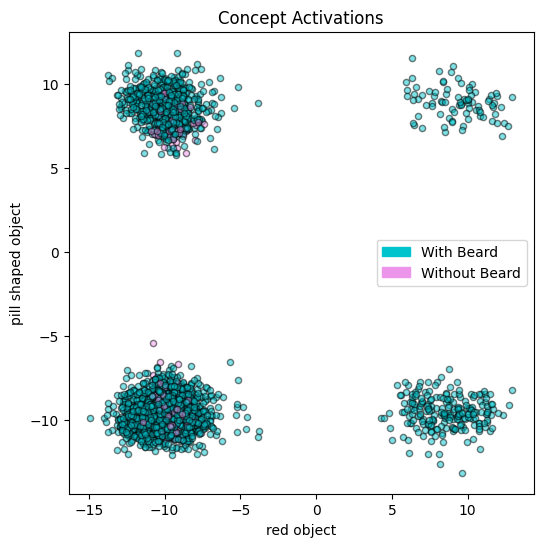

In [ ]:
from tqdm import tqdm
from matplotlib import pyplot as plt
PLOT_EVERY = 1
#decrease PLOT_EVERY to 1 to have maximum resolution

concept_activations = outputs['concepts_pred']
num_samples = concept_activations.shape[0]

x_idx = 23  # No_beard
y_idx = 35  # Wearing lipstick
#y_idx = 37 # Wearing necktie
x_idx = 20 # Red object
y_idx = 41  # Pill object

def check_condition(activations, idx, label):
    if activations[idx, 23] < 0.48 and activations[idx, 23]> 0.4 and label == 1:
        print(idx)


# Highlight some samples
highlight = []

# Plot the scatter plot
plt.figure(figsize=(6, 6))
for i in tqdm(range(num_samples)):
    if i%PLOT_EVERY == 0:
        #check_condition(concept_activations,i,outputs['labels_gt'][i])
        x = concept_activations[i,x_idx]
        y = concept_activations[i,y_idx]
        label = outputs['labels_gt'][i]
        #if label == 0:
        #    color = '#ecc26cff' #Red
        #else:
        #    color = '#344fcdff' #Blue

        if outputs['concepts_gt'][i][23] == 0:
            color = '#00c4cdff'
        else:
            color = '#ed94ebff'

        #if outputs['concepts_gt'][i][35] == 0:
        #    color = '#dc7272ff'
        #else:
        #    color = '#5ac1e3ff'
        plt.scatter(x, y, c=color, label="_nolegend_", s = 20, alpha=0.5, edgecolors='k')

for i in highlight:
    x = concept_activations[i,x_idx]
    y = concept_activations[i,y_idx]
    plt.scatter(x, y, c='green', alpha=1.0, edgecolors='k')

# Labels and title
plt.xlabel(f'{concept_names[x_idx]}')
plt.ylabel(f'{concept_names[y_idx]}')
# Add legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#00c4cdff', label='With Beard')
blue_patch = mpatches.Patch(color='#ed94ebff', label='Without Beard')
# Add the custom legend
plt.legend(handles=[red_patch, blue_patch])
plt.title('Concept Activations')
plt.show()

  0%|          | 0/30000 [00:00<?, ?it/s]

100%|██████████| 30000/30000 [00:01<00:00, 28223.62it/s]


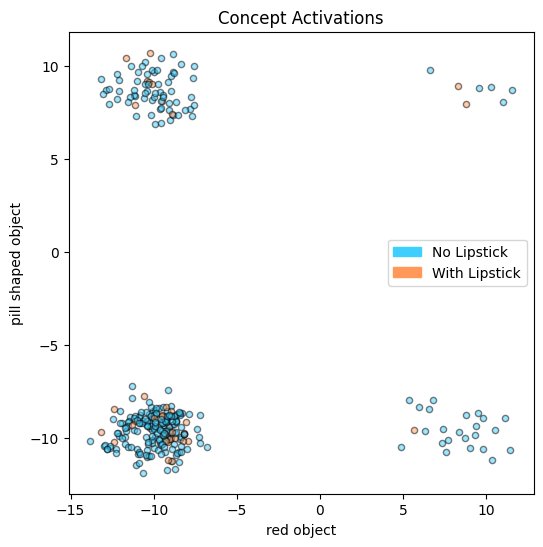

In [ ]:
from tqdm import tqdm
from matplotlib import pyplot as plt
PLOT_EVERY = 10
#decrease PLOT_EVERY to 1 to have maximum resolution

concept_activations = outputs['concepts_pred']
num_samples = concept_activations.shape[0]

x_idx = 23  # No_beard
y_idx = 35  # Wearing lipstick
#y_idx = 37 # Wearing necktie
x_idx = 20 # Red object
y_idx = 41  # Pill object

def check_condition(activations, idx, label):
    if activations[idx, 23] < 0.48 and activations[idx, 23]> 0.4 and label == 1:
        print(idx)


# Highlight some samples
highlight = []

# Plot the scatter plot
plt.figure(figsize=(6, 6))
for i in tqdm(range(num_samples)):
    if i%PLOT_EVERY == 0:
        #check_condition(concept_activations,i,outputs['labels_gt'][i])
        x = concept_activations[i,x_idx]
        y = concept_activations[i,y_idx]
        label = outputs['labels_gt'][i]
        #if label == 0:
        #    color = '#ecc26cff' #Red
        #else:
        #    color = '#344fcdff' #Blue

        #if outputs['concepts_gt'][i][23] == 0:
        #    color = '#ed94ebff'
        #else:
        #    color = '#743717ff'

        if outputs['concepts_gt'][i][35] == 0:
            color = '#3ecfffff'
        else:
            color = '#ff9859ff'
        plt.scatter(x, y, c=color, label="_nolegend_", s = 20, alpha=0.5, edgecolors='k')

for i in highlight:
    x = concept_activations[i,x_idx]
    y = concept_activations[i,y_idx]
    plt.scatter(x, y, c='green', alpha=1.0, edgecolors='k')

# Labels and title
plt.xlabel(f'{concept_names[x_idx]}')
plt.ylabel(f'{concept_names[y_idx]}')
# Add legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#3ecfffff', label='No Lipstick')
blue_patch = mpatches.Patch(color='#ff9859ff', label='With Lipstick')
# Add the custom legend
plt.legend(handles=[red_patch, blue_patch])
plt.title('Concept Activations')
plt.show()

# Histograms

In [ ]:
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
PLOT_EVERY = 1
#decrease PLOT_EVERY to 1 to have maximum resolution

concept_activations = outputs['concepts_pred']
num_samples = concept_activations.shape[0]

x_idx = 23  # No_beard
y_idx = 35  # Wearing lipstick
#y_idx = 37 # Wearing necktie
x_idx = 20 # Red object
y_idx = 41  # Pill object

def check_condition(activations, idx, label):
    if activations[idx, 23] < 0.48 and activations[idx, 23]> 0.4 and label == 1:
        print(idx)

Lclass_0 = []
Lclass_1 = []
Aclass_0 = []
Aclass_1 = []
Bclass_0 = []
Bclass_1 = []


for i in tqdm(range(num_samples)):
    if i%PLOT_EVERY == 0:
        #check_condition(concept_activations,i,outputs['labels_gt'][i])
        x = concept_activations[i,x_idx]
        y = concept_activations[i,y_idx]
        label = outputs['labels_gt'][i]
        if label == 0:
            Lclass_0.append(x.item())
        else:
            Lclass_1.append(x.item())
        if outputs['concepts_gt'][i][23] == 0:
            Aclass_0.append(x.item())
        else:
            Aclass_1.append(x.item())
        if outputs['concepts_gt'][i][35] == 0:
            Bclass_0.append(x.item())
        else:
            Bclass_1.append(x.item())
        


100%|██████████| 30000/30000 [00:01<00:00, 21625.53it/s]


In [ ]:
from scipy.stats import gaussian_kde
import numpy as np
# Create the KDE for both datasets using scipy
Akde_0 = gaussian_kde(Aclass_0, bw_method=0.1)  # Adjust bandwidth if needed
Akde_1 = gaussian_kde(Aclass_1, bw_method=0.1)
# Create the KDE for both datasets using scipy
Bkde_0 = gaussian_kde(Bclass_0, bw_method=0.1)  # Adjust bandwidth if needed
Bkde_1 = gaussian_kde(Bclass_1, bw_method=0.1)
# Create the KDE for both datasets using scipy
Lkde_0 = gaussian_kde(Lclass_0, bw_method=0.1)  # Adjust bandwidth if needed
Lkde_1 = gaussian_kde(Lclass_1, bw_method=0.1)

max_y = 0
min_x = 10000
max_x = 0
for c0,c1,kde_0,kde_1 in [(Aclass_0,Aclass_1,Akde_0,Akde_1), (Bclass_0,Bclass_1,Bkde_0,Bkde_1), (Lclass_0,Lclass_1,Lkde_0,Lkde_1)]:
    # Generate points for plotting
    x_0 = np.linspace(min(c0), max(c0), 1000)
    x_1 = np.linspace(min(c1), max(c1), 1000)
    # Compute the density for each dataset
    y_0 = kde_0(x_0)
    y_1 = kde_1(x_1)
    if np.max(y_0) > max_y:
        max_y = np.max(y_0)
    if np.max(y_1) > max_y:
        max_y = np.max(y_1)

    if min(min(c0),min(c1)) < min_x:
        min_x = min(min(c0),min(c1))
    if max(max(c0),max(c1)) > max_x:
        max_x = max(max(c0),max(c1))

print(max_y)


0.5060816739609428


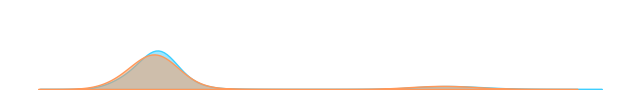

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
# Plot the scatter plot
plt.figure(figsize=(8, 5))

kde_0 = sns.kdeplot(Bclass_0, color="#3ecfffff", fill = True, label="No Lipstick", alpha=0.5)
kde_1 = sns.kdeplot(Bclass_1, color="#ff9859ff",fill = True, label="Lipstick", alpha=0.5)        

# Labels and legend
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("")
#plt.legend()
plt.ylim(min_x,max_x)
plt.ylim(0,max_y)
# Scale the y-axis
plt.gca().set_aspect(10)  # Reduce the y-axis height without cropping data
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

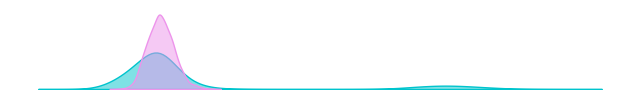

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(8, 5))

sns.kdeplot(Aclass_0, color="#00c4cdff", fill = True, label="No Beard", alpha=0.5)
sns.kdeplot(Aclass_1, color="#ed94ebff",fill = True, label="With Beard", alpha=0.5)        
# Labels and legend
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("")
#plt.legend()
plt.ylim(min_x,max_x)
plt.ylim(0,max_y)
# Scale the y-axis
plt.gca().set_aspect(10)  # Reduce the y-axis height without cropping data
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

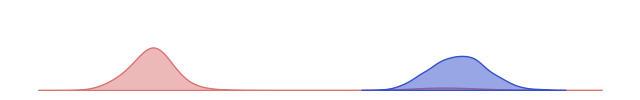

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(8, 5))

sns.kdeplot(Lclass_0, color="#dc7272ff", fill = True, label="Female", alpha=0.5)
sns.kdeplot(Lclass_1, color="#344fcdff",fill = True, label="Male", alpha=0.5)        
# Labels and legend
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("")
#plt.legend()
plt.ylim(min_x,max_x)
plt.ylim(0,max_y)
# Scale the y-axis
plt.gca().set_aspect(10)  # Reduce the y-axis height without cropping data
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()